In [9]:
import pandas as pd
import os

# Directory where the data is located
data_dir = "../data/"

# List of all files in the data directory
data_files = os.listdir(data_dir)
print(data_files)
# Loop through each file, read it as a DataFrame, and print the shape
for file_name in data_files:
    if file_name.endswith('.csv'):  # Check if the file is a CSV
        file_path = os.path.join(data_dir, file_name)
        try:
            df = pd.read_csv(file_path)
            print(f"{file_name}: {df.shape}")
        except Exception as e:
            print(f"Could not load {file_name}: {e}")


['kaggle_evaluation', 'test.csv', 'train.csv', 'sample_submission.csv', 'concepts.csv']
test.csv: (3, 810)
train.csv: (233234, 814)
sample_submission.csv: (3, 2)
concepts.csv: (809, 9)


In [10]:
# weirdly the there is only 3 test samples. 
# the features are in quite some different formats. We have what appears to be floats, bools and strings (categorical)
test_df = pd.read_csv(os.path.join(data_dir, 'test.csv'), index_col=0)
print("Head of test.csv:")
print(test_df.head())

Head of test.csv:
       GameRulesetName                                 agent1  \
Id                                                              
233234             00Y                MCTS-UCB1-0.6-NST-false   
233235             00Y  MCTS-ProgressiveHistory-0.1-MAST-true   
233236             00Y      MCTS-UCB1Tuned-0.1-Random200-true   

                                       agent2  Properties  Format  Time  \
Id                                                                        
233234  MCTS-ProgressiveHistory-0.1-MAST-true           1       1     1   
233235                MCTS-UCB1-0.6-NST-false           1       1     1   
233236  MCTS-ProgressiveHistory-0.1-MAST-true           1       1     1   

        Discrete  Realtime  Turns  Alternating  ...  Efficiency  CopyContext  \
Id                                              ...                            
233234         1         0      1            1  ...           1            0   
233235         1         0      1       

In [11]:
# Print the head of sample_submission.csv
sample_submission_df = pd.read_csv(
    os.path.join(data_dir, 'sample_submission.csv'), index_col=0)
print("Head of sample_submission.csv:")
print(sample_submission_df.head())

Head of sample_submission.csv:
        utility_agent1
Id                    
233234             0.0
233235             0.0
233236             0.0


In [12]:
# Print the head of train.csv
train_df = pd.read_csv(os.path.join(data_dir, 'train.csv'), index_col=0)
# print("Head of train.csv:")
# print(train_df.head())

print("Column names of train.csv:")
print(train_df.columns)

X = train_df.iloc[:, :-1]
print("Shape of x (all except last column):")
print(X.shape)


Column names of train.csv:
Index(['GameRulesetName', 'agent1', 'agent2', 'Properties', 'Format', 'Time',
       'Discrete', 'Realtime', 'Turns', 'Alternating',
       ...
       'DoLudeme', 'Trigger', 'PlayoutsPerSecond', 'MovesPerSecond',
       'EnglishRules', 'LudRules', 'num_wins_agent1', 'num_draws_agent1',
       'num_losses_agent1', 'utility_agent1'],
      dtype='object', length=813)
Shape of x (all except last column):
(233234, 812)


In [13]:
# Identify non-continuous columns (categorical columns)
non_continuous_columns = X.select_dtypes(include=['object']).columns

# Print the number of categories in each non-continuous column
for column in non_continuous_columns:
    num_categories = train_df[column].nunique()
    print(f"{column}: {num_categories} categories")
    


GameRulesetName: 1377 categories
agent1: 72 categories
agent2: 72 categories
EnglishRules: 1328 categories
LudRules: 1373 categories


In [14]:
# Step 1: Identify boolean columns (only 0 and 1 values)
boolean_columns = [col for col in train_df.select_dtypes(include=['int64']).columns
                   if train_df[col].dropna().isin([0, 1]).all()]

print("number of boolean features:", len(boolean_columns))

# BEGIN: Make features type bool in the original X matrix if they are in boolean_columns
for col in boolean_columns:
    X[col] = X[col].astype(bool)
# END:


number of boolean features: 576


In [15]:
# Select integer columns that are not boolean columns
integer_columns = train_df.select_dtypes(include=['int64']).columns
non_boolean_integer_columns = [col for col in integer_columns if col not in boolean_columns]

# Create a new DataFrame with only the non-boolean integer columns
non_boolean_integer_df = train_df[non_boolean_integer_columns]

# Print the range (min and max) of each non-boolean integer column
for column in non_boolean_integer_df.columns:
    min_value = non_boolean_integer_df[column].min()
    max_value = non_boolean_integer_df[column].max()
    print(f"{column}: Range = {min_value} to {max_value}")

NumPlayers: Range = 2 to 2
NumPlayableSitesOnBoard: Range = 1 to 1681
NumColumns: Range = 1 to 86
NumRows: Range = 1 to 86
NumCorners: Range = 1 to 120
NumOuterSites: Range = 1 to 160
NumInnerSites: Range = 0 to 1521
NumLayers: Range = 0 to 5
NumEdges: Range = 4 to 3906
NumCells: Range = 0 to 1681
NumVertices: Range = 4 to 2646
NumPerimeterSites: Range = 1 to 160
NumTopSites: Range = 1 to 41
NumBottomSites: Range = 1 to 41
NumRightSites: Range = 1 to 41
NumLeftSites: Range = 1 to 41
NumCentreSites: Range = 1 to 16
NumConvexCorners: Range = 0 to 120
NumConcaveCorners: Range = 0 to 28
NumPhasesBoard: Range = 1 to 5
NumContainers: Range = 1 to 4
NumPlayableSites: Range = 1 to 1683
NumComponentsType: Range = 1 to 236
NumDice: Range = 0 to 7
NumStartComponentsBoard: Range = 0 to 354
NumStartComponentsHand: Range = 0 to 304
NumStartComponents: Range = 0 to 354
NumPlayPhase: Range = 1 to 8
num_wins_agent1: Range = 0 to 44
num_draws_agent1: Range = 0 to 30
num_losses_agent1: Range = 0 to 45


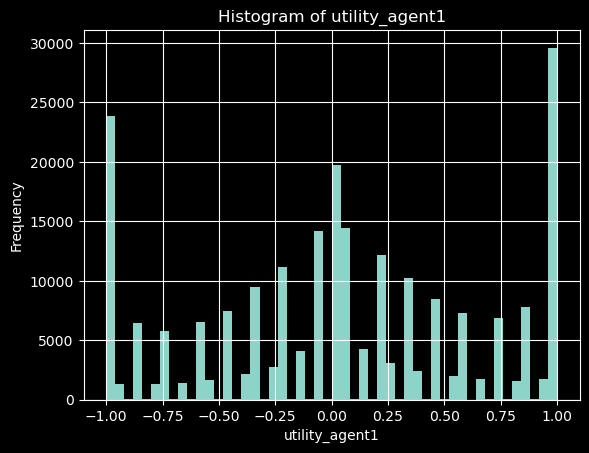

In [17]:
import matplotlib.pyplot as plt

y  = train_df['utility_agent1']

y.hist(bins=50)
plt.xlabel('utility_agent1')
plt.ylabel('Frequency')
plt.title('Histogram of utility_agent1')
plt.show()

Boolean Features Analysis: Calculates the distribution of True and False values for each boolean feature. If over 95% of the values are the same, the feature is added to low_variance_features as it may not provide much information.

Categorical Features Analysis: Counts the unique values in each categorical (string) feature. If a feature has fewer than three unique values, it’s added to low_variance_features.

Numerical Features Analysis: Calculates variance for each numerical feature and identifies those with very low variance (< 1e-5) as potentially irrelevant features.

In [18]:

# Initialize dictionaries to store the variability metrics
low_variance_features = []   # List of features with low variance
categorical_features_info = {}  # Info on categorical features
boolean_features_info = {}   # Distribution of boolean features

# Loop through each column and analyze variability
for col in X.columns:
    # Boolean Features
    if X[col].dtype == 'bool':
        value_counts = X[col].value_counts(normalize=True)
        boolean_features_info[col] = value_counts.to_dict()
        # Identify low-variability boolean features
        if value_counts.max() > 0.95:
            low_variance_features.append(col)

    # Categorical Features (strings)
    elif X[col].dtype == 'object':
        unique_count = X[col].nunique()
        categorical_features_info[col] = unique_count
        # Consider removing features with a very low number of unique values (e.g., < 3)
        if unique_count < 3:
            low_variance_features.append(col)

    # Numerical Features (integers and floats)
    elif pd.api.types.is_numeric_dtype(X[col]):
        variance = X[col].var()
        # Log variance of each numerical feature and mark low variance features
        if variance < 1e-5:
            low_variance_features.append(col)

# Summary of findings
print("Low Variance Features:", len(low_variance_features))

# print("\nBoolean Features Distribution:", boolean_features_info)
# print("\nCategorical Features Unique Values Count:", categorical_features_info)


Low Variance Features: 402


Correlation Analysis: For correlation, only numeric columns are used. The code lists highly correlated pairs and plots the correlation matrix, giving insight into redundancy among numerical features.

PCA: Focused on numeric columns, PCA identifies how many principal components capture 95% of the variance, offering insight into dimensionality.

Feature Importance with Random Forest: This step uses a Random Forest model on the entire dataset, with categorical columns one-hot encoded. It highlights the top 20 features by importance, providing a preliminary ranking for feature selection.


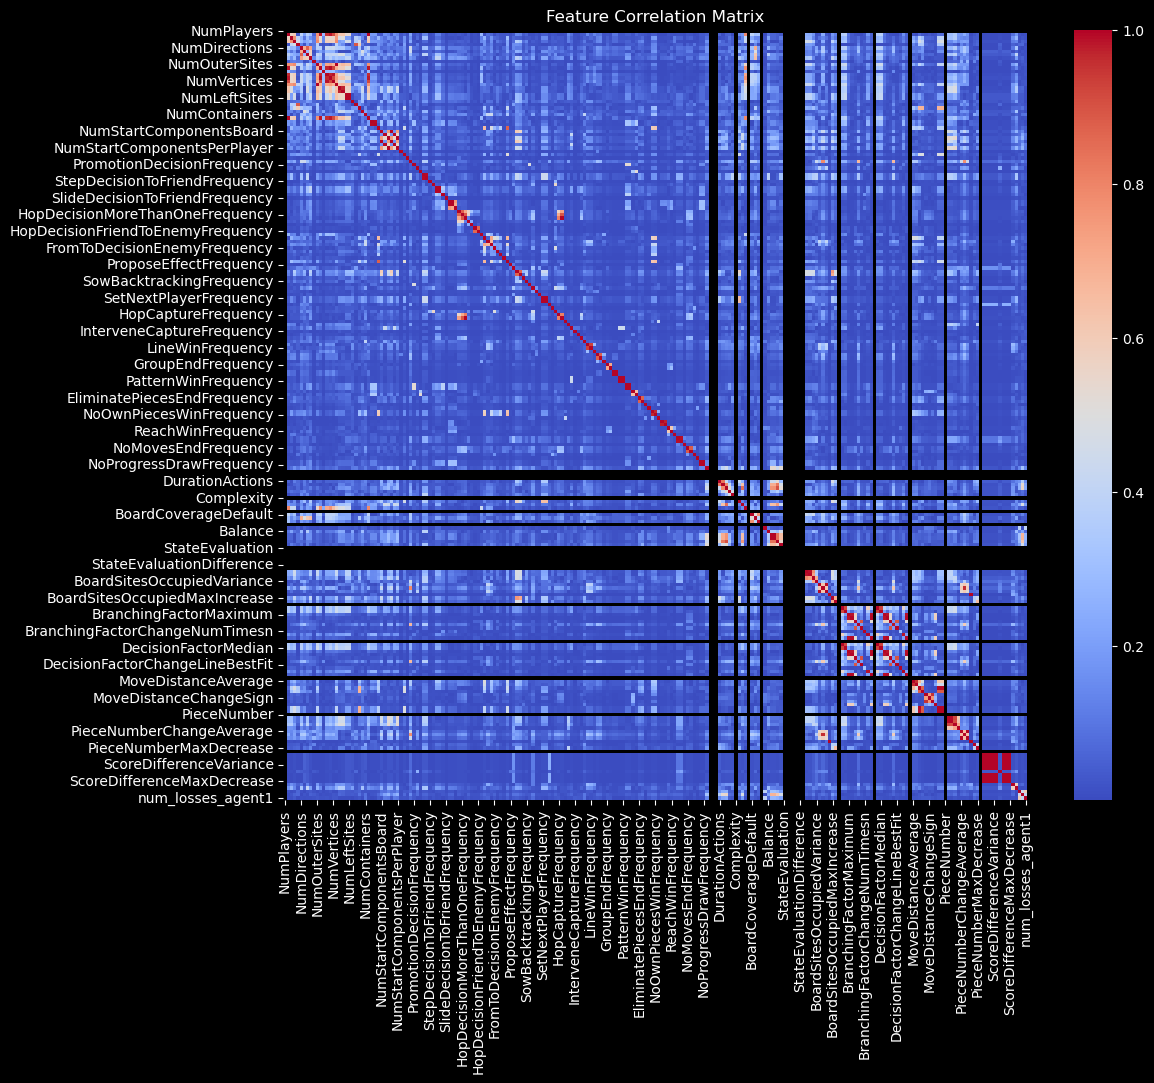

Reduced to 1 components from 231 original features with PCA
Feature Clusters:
Cluster 0: ['NumPlayers', 'NumPlayableSitesOnBoard', 'NumColumns', 'NumRows', 'NumCorners', 'NumDirections', 'NumOrthogonalDirections', 'NumDiagonalDirections', 'NumAdjacentDirections', 'NumOffDiagonalDirections', 'NumOuterSites', 'NumInnerSites', 'NumLayers', 'NumEdges', 'NumCells', 'NumVertices', 'NumPerimeterSites', 'NumTopSites', 'NumBottomSites', 'NumRightSites', 'NumLeftSites', 'NumCentreSites', 'NumConvexCorners', 'NumConcaveCorners', 'NumPhasesBoard', 'NumContainers', 'NumPlayableSites', 'NumComponentsType', 'NumComponentsTypePerPlayer', 'NumDice', 'NumStartComponentsBoard', 'NumStartComponentsHand', 'NumStartComponents', 'NumStartComponentsBoardPerPlayer', 'NumStartComponentsHandPerPlayer', 'NumStartComponentsPerPlayer', 'SwapPlayersDecisionFrequency', 'PassDecisionFrequency', 'ProposeDecisionFrequency', 'AddDecisionFrequency', 'PromotionDecisionFrequency', 'RemoveDecisionFrequency', 'RotationDecisio

In [21]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix and visualize it
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = X[numeric_cols].corr().abs()
high_corr_pairs = [(i, j) for i in corr_matrix.columns for j in corr_matrix.columns if i !=
                   j and corr_matrix.loc[i, j] > 0.9]
# print(f"Highly correlated feature pairs: {high_corr_pairs}")

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Matrix")
plt.show()

# Step 3: PCA for Dimensionality Reduction
# Standardize only numeric data for PCA
X_numeric = X[numeric_cols].fillna(0)  # Fill NaNs if necessary
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_pca = pca.fit_transform(X_numeric)
print(f"Reduced to {X_pca.shape[1]} components from {
      X_numeric.shape[1]} original features with PCA")

# Using KMeans to cluster features based on similarity
# We transpose X_numeric so that features (columns) are clustered, not rows (samples)
n_clusters = 10  # Adjust based on preference or experimentation
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
X_cluster = kmeans.fit_transform(X_numeric.T)
feature_clusters = kmeans.labels_

# Display features in each cluster
clustered_features = {}
for i in range(n_clusters):
    clustered_features[i] = [X_numeric.columns[idx]
                             for idx, label in enumerate(feature_clusters) if label == i]
print("Feature Clusters:")
      
for cluster_id, features in clustered_features.items():
    print(f"Cluster {cluster_id}: {features}")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# Encode Categorical Features and Standardize Data
X_encoded = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Calculate Correlation of Each Feature with y
correlations = X_encoded.corrwith(y).abs()
correlation_df = pd.DataFrame(
    {'feature': X_encoded.columns, 'correlation_with_y': correlations})
correlation_df = correlation_df.sort_values(
    by='correlation_with_y', ascending=False)

# Use K-Means Clustering on Feature Correlations
# Reshape the correlation values to use as input for clustering
correlation_values = correlations.values.reshape(-1, 1)
n_clusters = 10  # Number of clusters can be adjusted
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
correlation_df['cluster'] = kmeans.fit_predict(correlation_values)

# UMAP for Dimensionality Reduction to 2D
umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_embedding = umap_reducer.fit_transform(correlation_values)

# Plot the UMAP Clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=umap_embedding[:, 0], y=umap_embedding[:, 1],
    hue=correlation_df['cluster'], palette="viridis", s=100, alpha=0.7
)
for i, feature in enumerate(correlation_df['feature']):
    plt.text(umap_embedding[i, 0], umap_embedding[i, 1],
             feature, fontsize=8, ha='right')
plt.title("UMAP Projection of Feature Clusters Based on Correlation with y")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()